# <table> <tr style="background:white; width:100%"> <td style="text-align:left"> <h1 style="font-size:2.5em"> Circuit Analysis </h1> </td> <td><img src="./_Resources/logo.png" style="border-radius:10px;width:100px"/> </td> </tr> </table>

# <span style='color:#484848;'> Basic active circuits with an OpAmp </span>

### <span style='color:#00aba1;'> Keywords </span>
```RC Circuits```, ```Circuit Analysis```, ```Arduino```

### <span style='color:#00aba1;'> Notebook Info </span>

**Contributor(s):** Afonso Raposo, Joana Pinto, Prof. João Sanches; Prof. Hugo Silva

**Date of creation:** dd/mm/aa

**Last update:** 2021

# I. Introduction
<br>
<div class="title"style="width:100%; background:#fdc86e;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

## <div style="color:#fdc86e"> 1. Background </div>

This session aims at exploring basic circuit analysis in the time and frequency domains, as well as further illustrating the use of Arduino as laboratory equipment. 


<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    If you have difficulties with the hardware setup, use Tinkercad. <br/>Files with pre-recorded data are also provided for some experiments.
</div>
</div>

## <div style="color:#fdc86e"> 2. Objectives</div>
* Revisit basic circuit analysis
* Use Arduino-type systems as a basic signal visualizer 
* Explore experimental characterization of electronic circuits

## <div style="color:#fdc86e"> 3. Materials (optional) </div>
* Arduino IDE
* 1x Breadboard
* 5x Jumper wires
* 4x 10kOhm resistors
* 1x 100nF capacitor
* 1x Arduino (or analogous device)
* 1x USB cable
* Function generator

# II. Experimental
<br>
<div style="width:100%; background:#fdc86e;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

Mount the passive RC circuit of Figure 1 using the materials available in your kit.

Use the Function Generator to generate Vi. Optionally, you can use the Arduino to generate Vi.

<img src="rccircuit-r1-30k.png" width=400/>

<div width="100%" align="center">Figure 1 - RC passive test circuit</div>

# III. Explore
<br>
<div class='h1'  style="width:100%; background:#fdc86e;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

## <div style="color:#fdc86e">  1. Quizz </div>

1) Derive the voltages ($v$) and currents ($i$) displayed in the circuit when a DC voltage, (e.g. $v_i$ = $V_{cc}$) is applied at the input.

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    $V_{cc}$ = 5.0V on the Seeeduino Nano<br/>$V_{cc}$ = 3.3V on the Seeeduino XIAO
</div>
</div>

|       | Derived |       | Derived |
| ----- |:-------:| ------|:-------:|
| $v_i$ |         | $i_1$ |         |
| $v_o$ |         | $i_2$ |         |
| $v_c$ |         | $i_c$ |         |
| $v_1$ |         |       |         |

2)  Derive the transfer function $G(s)=v_o(s)/v_i(s)$ and the frequency response, $H(ω)$. What type of filter is this circuit? Characterize it according the following parameters:

    a) DC gain
    b) -3dB cut-off frequency
    c) High frequency asymptotic decay slope.

3) Using the Function Generator in the square wave mode and your Arduino-based analog voltage meter firmware, apply a 10Hz square wave with amplitude $[0; V_{cc}]$ as $v_i$ and record $v_i$ and $v_o$ as time series using a 750 $\mu$S sampling period (a 1Mbps baud rate is recommended). Compare $v_o$ with the voltage derived in 1), and discuss your overall observations.

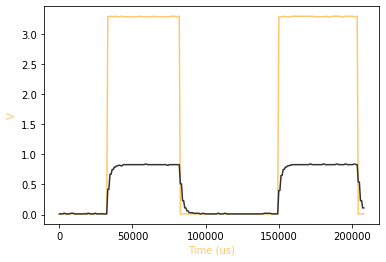

In [2]:
import pylab as pl
import matplotlib.pyplot as plt

fname = './data/L4.3-10.csv'

dados = pl.loadtxt(fname,  delimiter = ',')

n = 250

t = dados[:n, 0]-dados[0,0]
vi = dados[:n, 1]
vo = dados[:n, 2]

plt.xlabel('Time (us)', color = "#fdc86e")
plt.ylabel('V', color = "#fdc86e")

plt.plot(t, vi, color = "#fdc86e")
plt.plot(t, vo, color = "#333333")

plt.show()

In [8]:
dados = pl.loadtxt('./data/L4.3.csv',  delimiter = ',')

t = dados[:, 0]
vi = dados[:, 1]
vo = dados[:, 2]

new = (pl.arange(0,len(t))/2).astype(int)

vi2 = vi[new]
vo2 = vo[new]

with open('./data/L4.3-10.csv','w') as f:
    for i in range(len(new)):
        f.write("{}, {}, {}\n".format(int(t[i]),vi2[i],vo2[i]))
    

4) The following Table presents the magnitude measurements of $v_o$, for the following variant of the circuit presented in Figure 1, where $R_1 = 1kΩ$, having sine waves of different frequencies with 1 $V_{pp}$ as input, $v_i$. Display these results in the semi-log plot in the next page in dBs ($20.log(v_o/v_i)$), and draw the asymptotic frequency response, derived from the transfer function obtained in 2), over the experimental points in the Table.

<img src="rccircuit.png" width=400/>

In [9]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

fname = './data/L4.4.csv'

dados = pd.read_csv(fname,  delimiter = ',', usecols=(1,2))

dados

,Freq. (Hz),Vpp (mV)
0,5.0,940.20
1,10.0,940.20
2,50.0,930.40
3,100.0,930.40
4,500.0,918.20
5,1000.0,880.70
6,1500.0,820.90
7,2000.0,750.80
8,2500.0,690.30
9,3000.0,630.20


<img src="./_Resources/asymptoticfrequencyresponse.png" width=800/>


<div style="width: 100%; ">
<div style="background:#fdc86e;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Prof. João Sanches; Prof. Hugo Plácido da Silva; Joana Pinto; Afonso Raposo```